In [1]:
import pandas as pd
import numpy as np
import gradio as gr
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the dataset
dataset = pd.read_csv("C:/Users/muSyR/OneDrive/Desktop/UC Davis Assignments/SQ 23/ECS 171/Project/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# Map 'Churn' column
dataset = dataset.dropna()
mapping = {'Yes': 1, 'No': 0}
dataset['Churn'] = dataset['Churn'].replace(mapping)


y = dataset['Churn']
# Clean dataset
x = dataset.drop(['customerID', 'tenure', 'Partner', 'gender', 'PaperlessBilling', 'Churn'], axis = 1)

# Classify the dataset-> turn string into classifier 
# Define mappings from category names to numbers
mapping = {'Yes': 1, 'No': 0}
x['Dependents'] = x['Dependents'].replace(mapping)
x['PhoneService'] = x['PhoneService'].replace(mapping)

mapping = {'Yes': 1, 'No': 0, 'No phone service' : 0}
x['MultipleLines'] = x['MultipleLines'].replace(mapping)

mapping = {'No': 0, 'DSL': 1, 'Fiber optic' : 2}
x['InternetService'] = x['InternetService'].replace(mapping)

mapping = {'Yes': 1, 'No': 0, 'No internet service' : 0}
x['OnlineSecurity'] = x['OnlineSecurity'].replace(mapping)
x['DeviceProtection'] = x['DeviceProtection'].replace(mapping)
x['TechSupport'] = x['TechSupport'].replace(mapping)
x['StreamingTV'] = x['StreamingTV'].replace(mapping)
x['StreamingMovies'] = x['StreamingMovies'].replace(mapping)
x['OnlineBackup'] = x['OnlineBackup'].replace(mapping)


mapping = {'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)' : 2, 'Credit card (automatic)' : 3}
x['PaymentMethod'] = x['PaymentMethod'].replace(mapping)


mapping = {'Month-to-month': 0, 'One year': 1, 'Two year' : 2}
x['Contract'] = x['Contract'].replace(mapping)


# Convert 'Total Charges' to numeric, and coerce errors to NaN
x['TotalCharges'] = pd.to_numeric(x['TotalCharges'], errors='coerce')

# Get indices of rows with NaN values in 'TotalCharges'
nan_rows = x[x['TotalCharges'].isna()].index

# Drop these rows from both `x` and `y`
x = x.drop(nan_rows)
y = y.drop(nan_rows)

print(x)


      SeniorCitizen  Dependents  PhoneService  MultipleLines  InternetService  \
0                 0           0             0              0                1   
1                 0           0             1              0                1   
2                 0           0             1              0                1   
3                 0           0             0              0                1   
4                 0           0             1              0                2   
...             ...         ...           ...            ...              ...   
7038              0           1             1              1                1   
7039              0           1             1              1                2   
7040              0           1             0              0                1   
7041              1           0             1              1                2   
7042              0           0             1              0                2   

      OnlineSecurity  Onlin

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(x)
X = pd.DataFrame(data = X_rescaled, columns = x.columns)

# You only need to do this if 'Churn' was originally a string. If it's already binary, you don't need to use get_dummies.
# y = pd.get_dummies(y)

# Splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

max_iterations = [500, 800, 1000]
hidden_layer_sizes = [(5, 7), (7, 5), (7, 13), (13, 10), (14,10), (10,10), (15,10)]
learning_rates = 0.15 * np.arange(1, 3)

param_grid = dict(learning_rate_init=learning_rates, hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iterations)

mlp = MLPClassifier(solver='sgd', random_state=42, activation='logistic')

grid = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3)  

grid.fit(X_train, y_train)

mlp_optimal = MLPClassifier(**grid.best_params_)
mlp_optimal.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(5, 7), learning_rate_init=0.15, max_iter=500)

In [5]:
print("Optimal Hyperparameters : ", grid.best_params_)
print("Optimal Accuracy: ", mlp_optimal.score(X, y))

Optimal Hyperparameters :  {'hidden_layer_sizes': (5, 7), 'learning_rate_init': 0.15, 'max_iter': 500}
Optimal Accuracy:  0.7342150170648464


In [6]:
# Define the classifier
clf = MLPClassifier(hidden_layer_sizes=(15, 10 , 6), max_iter=10000)

# Train the classifier
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Check the accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7725657427149965


In [7]:
# Create a Logistic Regression object
logistic_regression = LogisticRegression(max_iter=10000)

# Train the model using the training sets
logistic_regression.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = logistic_regression.predict(X_test)

# Check the accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7825159914712153


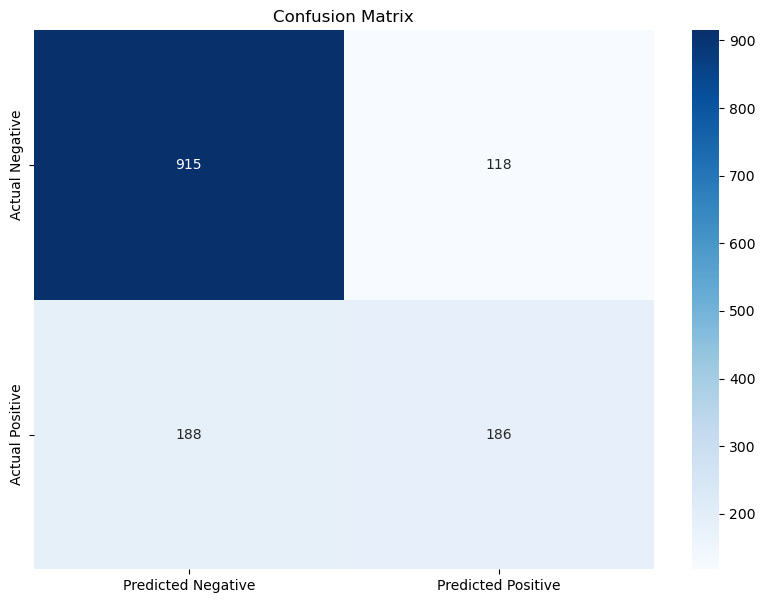

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, columns=['Predicted Negative', 'Predicted Positive'], 
                     index=['Actual Negative', 'Actual Positive'])

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7242359630419332


In [10]:
print(x.columns)

Index(['SeniorCitizen', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [11]:
def churn(SeniorCitizen, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, 
          DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaymentMethod, 
          MonthlyCharges, TotalCharges):
    
    x = np.array([SeniorCitizen, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, 
                OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaymentMethod, 
                MonthlyCharges, TotalCharges])
    
    prediction = logistic_regression.predict(x.reshape(1, -1))
    
    return prediction

In [12]:
output = gr.outputs.Textbox()

app = gr.Interface(fn = churn, inputs = 
                   ['checkbox', 
                    'checkbox',
                    'checkbox', 
                    'checkbox',
                    gr.Radio([0, 1, 2], info = "0: No  |  1: DSL  |  2: Fiber Optic"),
                    'checkbox',
                    'checkbox',
                    'checkbox',
                    'checkbox',
                    'checkbox',
                    'checkbox',
                    gr.Radio([0, 1, 2], info = "0: Month-to-month  |  1: One year  |  2: Two year"),
                    gr.Radio([0, 1, 2, 3], info = "0: Electronic check  |  1: Mailed check  |  2: Bank transfer (automatic)  |  3: Credit card (automatic)"),
                    'number',
                    'number'], 
                   outputs = output, description = "Churn Model (1 = They are going to leave the subscription service by next month, 0 = They are going to stay)")

C:\Users\muSyR\AppData\Roaming\Python\Python310\site-packages\gradio\outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


In [13]:
app.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
